# Simple Moving Average Crossover Trading Strategy

#### This program will calculate short and long exponential moving averages of a security via the Yahoo Finance API to determine buy or sell signals. The program will plot the moving averages and create markers indicating each crossover for easy analysis of stock price movement

***

### Import Libraries

In [37]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px

***

### Create a DataFrame containing historical stock data

`The user will input a ticker`

In [38]:
ticker = input('Choose a ticker').upper()

stock_df = yf.Ticker(ticker).history(period='2y')

stock_df = stock_df.drop(['Dividends', 'Stock Splits'], axis=1)

stock_df

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-17 00:00:00-04:00,231.966329,234.323819,229.098062,232.840561,29562100
2021-03-18 00:00:00-04:00,228.439921,230.041049,226.249432,226.632523,34833000
2021-03-19 00:00:00-04:00,226.927232,228.351541,225.286820,226.269104,46430700
2021-03-22 00:00:00-04:00,226.190509,232.703041,226.062807,231.809174,30127000
2021-03-23 00:00:00-04:00,233.282585,236.779513,232.870028,233.370987,31638400
...,...,...,...,...,...
2023-03-13 00:00:00-04:00,247.399994,257.910004,245.729996,253.919998,33339700
2023-03-14 00:00:00-04:00,256.750000,261.070007,255.860001,260.790009,33620300
2023-03-15 00:00:00-04:00,259.980011,266.480011,259.209991,265.440002,46028000


***

### Calculate & Analyze Simple Moving Averages

`Add columns for short and long MAs and for the buy/sell signals`

In [39]:
# Create columns to show the long and short moving averages
stock_df['Short SMA'] = stock_df['Close'].rolling(window=30, min_periods=1).mean()
stock_df['Long SMA'] = stock_df['Close'].rolling(window=100, min_periods=1).mean()

# Create a column to show when a crossover happens
stock_df['Position'] = np.where(stock_df['Short SMA']>stock_df['Long SMA'], 1, 0)

# Create a column to indicate the buy/sell signals
stock_df['Signal'] = stock_df['Position'].diff()

# Replace all NaN values with 0
stock_df.fillna(0, inplace=True)

stock_df

,Open,High,Low,Close,Volume,Short SMA,Long SMA,Position,Signal
Date,,,,,,,,,
2021-03-17 00:00:00-04:00,231.966329,234.323819,229.098062,232.840561,29562100,232.840561,232.840561,0,0.0
2021-03-18 00:00:00-04:00,228.439921,230.041049,226.249432,226.632523,34833000,229.736542,229.736542,0,0.0
2021-03-19 00:00:00-04:00,226.927232,228.351541,225.286820,226.269104,46430700,228.580729,228.580729,0,0.0
2021-03-22 00:00:00-04:00,226.190509,232.703041,226.062807,231.809174,30127000,229.387840,229.387840,0,0.0
2021-03-23 00:00:00-04:00,233.282585,236.779513,232.870028,233.370987,31638400,230.184470,230.184470,0,0.0
...,...,...,...,...,...,...,...,...,...
2023-03-13 00:00:00-04:00,247.399994,257.910004,245.729996,253.919998,33339700,256.305871,244.070874,1,0.0
2023-03-14 00:00:00-04:00,256.750000,261.070007,255.860001,260.790009,33620300,256.928751,244.306419,1,0.0
2023-03-15 00:00:00-04:00,259.980011,266.480011,259.209991,265.440002,46028000,257.537055,244.608557,1,0.0


`Plot a graph of close price and MAs and show the buy/sell signals`

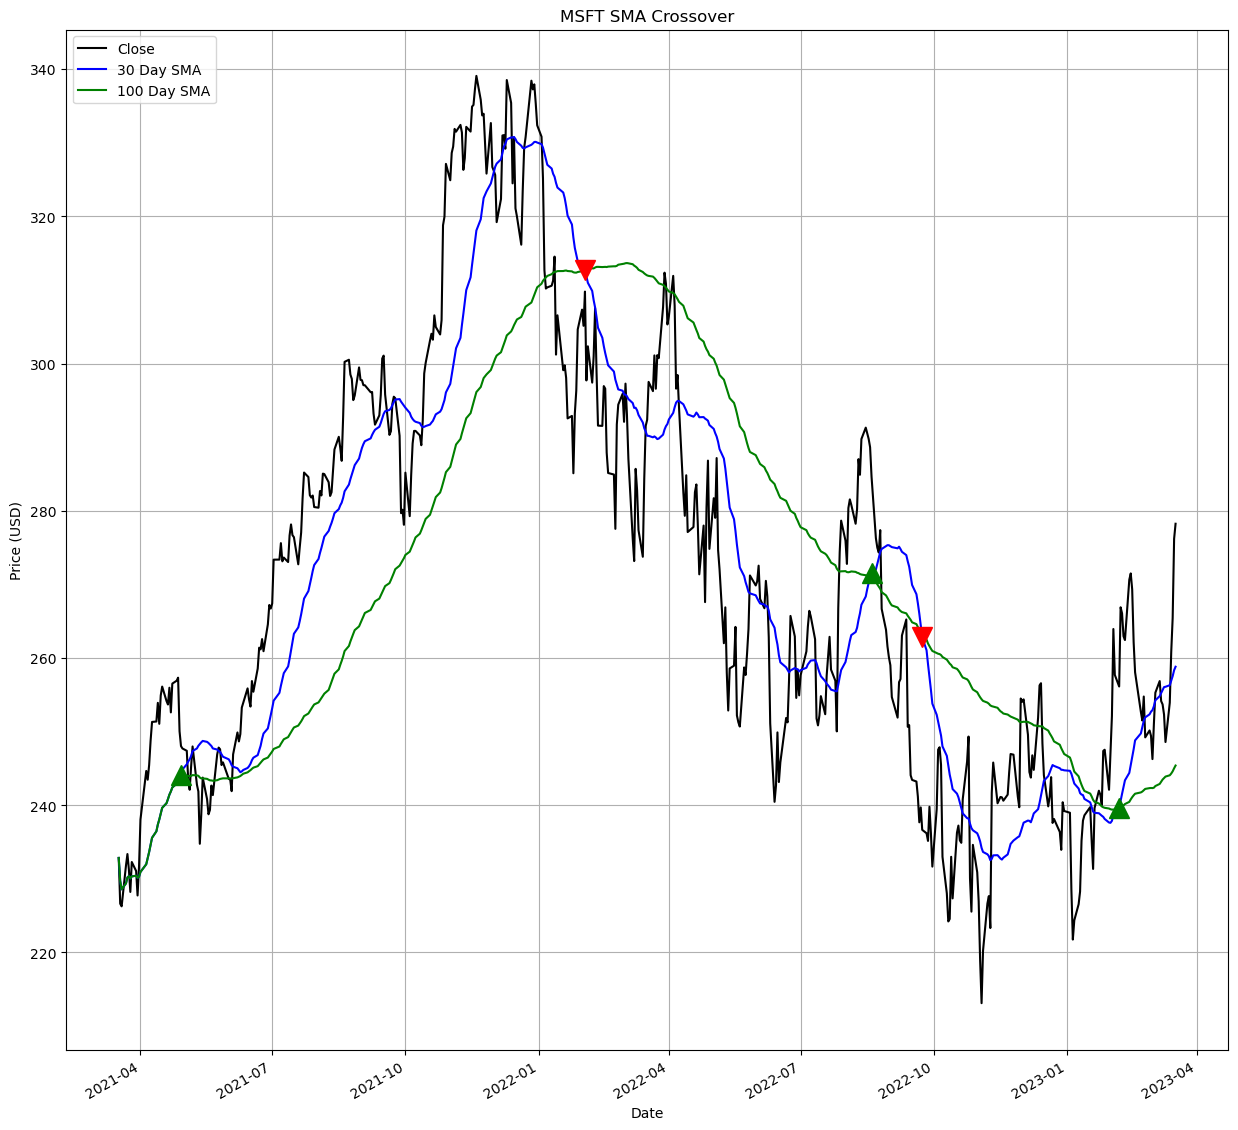

In [41]:
# Plot close price, short SMA, and long SMA; Set title, y-axis label, and legend
stock_df['Close'].plot(color='k', title='{} SMA Crossover'.format(ticker), ylabel='Price (USD)', figsize=(15,15))
stock_df['Short SMA'].plot(color='b', label='30 Day SMA')
stock_df['Long SMA'].plot(color='g', label='100 Day SMA', grid=True).legend(loc='upper left')

# Plot 'buy' signals
plt.plot(stock_df[stock_df['Signal'] == 1].index, stock_df['Short SMA'][stock_df['Signal'] == 1], '^', markersize = 15, color = 'g', label = 'buy')

# Plot 'sell' signals 
plt.plot(stock_df[stock_df['Signal'] == -1].index, stock_df['Short SMA'][stock_df['Signal'] == -1], 'v', markersize = 15, color = 'r', label = 'sell')